In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
housing = pd.read_csv('houses_to_rent.csv')
housing2 = pd.read_csv('houses_to_rent_v2.csv')

In [112]:
housing.drop('Unnamed: 0',axis=1,inplace=True)

In [113]:
housing.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"
6079,1,60,2,1,1,4,acept,furnished,R$489,"R$1,900",R$0,R$25,"R$2,414"


In [114]:
city = {1: 'São Paulo',0: 'Campinas'}
housing['city'] = housing['city'].apply(lambda x: city[x])

In [115]:
housing.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,Campinas,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,São Paulo,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,São Paulo,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,São Paulo,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [116]:
housing['hoa'] = housing['hoa'].apply(lambda x: x[2:])
housing['rent amount'] = housing['rent amount'].apply(lambda x: x[2:])
housing['property tax'] = housing['property tax'].apply(lambda x: x[2:])
housing['fire insurance'] = housing['fire insurance'].apply(lambda x: x[2:])
housing['total'] = housing['total'].apply(lambda x: x[2:])

In [117]:
def comma(x):
    if ',' in x:
        return int(x.replace(',',""))
    else:
        return int(x)

In [118]:
def nan(x):
    l = ['m info','cluso']
    if x in l:
        return '0'
    else:
        return x

In [119]:
housing['hoa'] = housing['hoa'].apply(lambda x: nan(x))
housing['rent amount'] = housing['rent amount'].apply(lambda x: nan(x))
housing['property tax'] = housing['property tax'].apply(lambda x: nan(x))
housing['fire insurance'] = housing['fire insurance'].apply(lambda x: nan(x))
housing['total'] = housing['total'].apply(lambda x: nan(x))

In [120]:
housing.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,240,3,3,4,-,acept,furnished,0,"8,000","1,000",121,"9,121"
1,Campinas,64,2,1,1,10,acept,not furnished,540,820,122,11,"1,493"
2,São Paulo,443,5,5,4,3,acept,furnished,"4,172","7,000","1,417",89,"12,680"
3,São Paulo,73,2,2,1,12,acept,not furnished,700,"1,250",150,16,"2,116"
4,São Paulo,19,1,1,0,-,not acept,not furnished,0,"1,200",41,16,"1,257"


In [121]:
housing.hoa.value_counts()

0        1493
1,000      82
1,200      71
1,500      70
1,100      70
         ... 
1,828       1
4,911       1
2,370       1
461         1
638         1
Name: hoa, Length: 1290, dtype: int64

In [122]:
housing['hoa'] = housing['hoa'].apply(lambda x: comma(x))
housing['rent amount'] = housing['rent amount'].apply(lambda x: comma(x))
housing['property tax'] = housing['property tax'].apply(lambda x: comma(x))
housing['fire insurance'] = housing['fire insurance'].apply(lambda x: comma(x))
housing['total'] = housing['total'].apply(lambda x: comma(x))

In [123]:
housing.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,240,3,3,4,-,acept,furnished,0,8000,1000,121,9121
1,Campinas,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,São Paulo,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,São Paulo,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,São Paulo,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257


In [134]:
housing.city.value_counts()

São Paulo    5249
Campinas      831
Name: city, dtype: int64

In [128]:
housing.floor.value_counts()

-     1555
1      573
3      401
2      379
4      319
5      314
6      306
8      291
7      287
9      224
10     213
11     193
12     179
13     143
14     141
15     107
16      89
17      73
18      69
19      47
20      36
21      30
23      26
25      23
22      21
24      11
27       7
28       6
26       6
29       4
85       1
68       1
35       1
31       1
99       1
51       1
32       1
Name: floor, dtype: int64

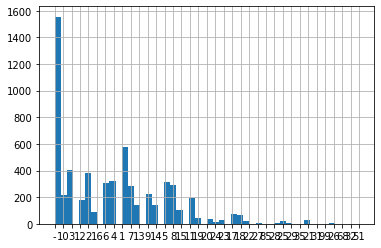

In [127]:
housing.floor.hist(bins=50)

In [124]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   object
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   int64 
 9   rent amount     6080 non-null   int64 
 10  property tax    6080 non-null   int64 
 11  fire insurance  6080 non-null   int64 
 12  total           6080 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 617.6+ KB


In [126]:
housing.corr().total

area              0.141064
rooms             0.310166
bathroom          0.386854
parking spaces    0.313975
hoa               0.546404
rent amount       0.542891
property tax      0.741742
fire insurance    0.524382
total             1.000000
Name: total, dtype: float64

In [35]:
housing2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [133]:
housing2.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [135]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [137]:
housing2.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [136]:
housing2.floor.value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
301       1
51        1
46        1
Name: floor, dtype: int64

In [130]:
housing2['rent amount (R$)'].value_counts()

2500     258
2000     244
1200     237
3000     235
15000    231
        ... 
1268       1
5350       1
1236       1
1196       1
4130       1
Name: rent amount (R$), Length: 1195, dtype: int64

In [31]:
housing2.furniture.value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

In [32]:
housing2.animal.value_counts()

acept        8316
not acept    2376
Name: animal, dtype: int64

In [33]:
housing2.bathroom.value_counts()

1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: bathroom, dtype: int64

In [34]:
housing2.rooms.value_counts()

3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64

In [139]:
housing2.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


([<matplotlib.axis.XTick at 0x124caee80>,
 <a list of 12 Text major ticklabel objects>)

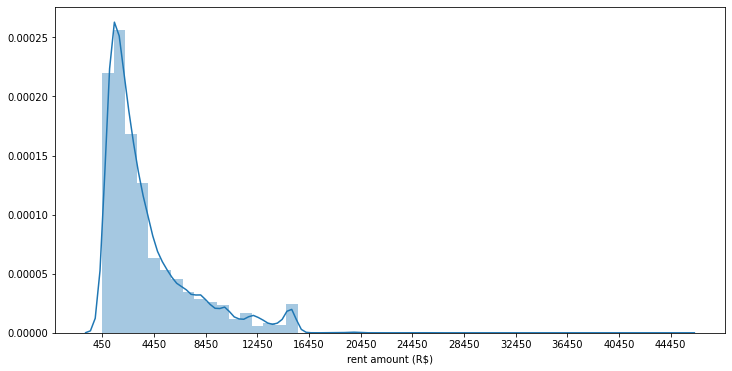

In [143]:
plt.figure(figsize=(12, 6))
sns.distplot(housing2['rent amount (R$)'])
plt.xticks(np.arange(housing2['rent amount (R$)'].min(), housing2['rent amount (R$)'].max(), step=4000))

([<matplotlib.axis.XTick at 0x124f73e10>,
 <a list of 12 Text major ticklabel objects>)

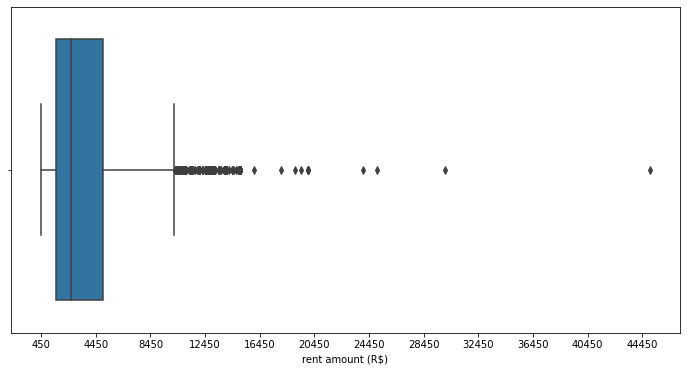

In [144]:
plt.figure(figsize=(12, 6))
sns.boxplot(housing2['rent amount (R$)'])
plt.xticks(np.arange(housing2['rent amount (R$)'].min(), housing2['rent amount (R$)'].max(), step=4000))

In [146]:
housing2['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [157]:
def city_plot():
    plt.figure(figsize=(18, 10))
    k = 1
    for i in housing2['city'].unique():
        plt.subplot(2, 3, k)
        plt.title(i)
        df = housing2[housing2['city'] == i]
        sns.distplot(df['rent amount (R$)'])
        plt.xticks(np.arange(df['rent amount (R$)'].min(), df['rent amount (R$)'].max(), step=4000))
        k += 1

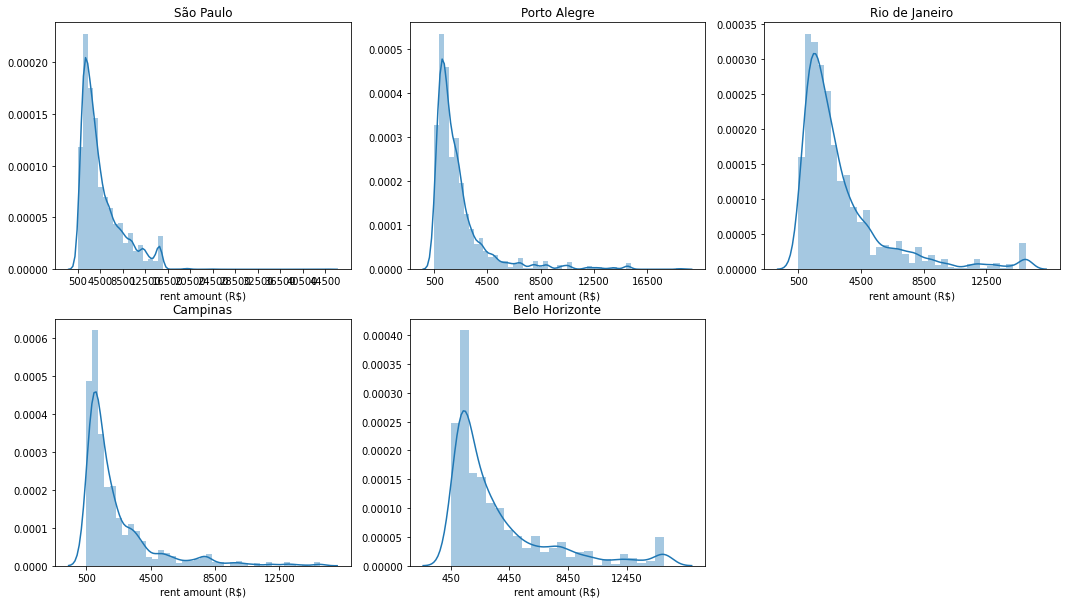

In [158]:
city_plot()

In [161]:
def box_plot():
    plt.figure(figsize=(18, 11))
    k = 1
    for i in housing2['city'].unique():
        plt.subplot(2, 3, k)
        plt.title(i)
        df = housing2[housing2['city'] == i]
        sns.boxplot(df['rent amount (R$)'])
        plt.xticks(np.arange(df['rent amount (R$)'].min(), df['rent amount (R$)'].max(), step=4000))
        k += 1

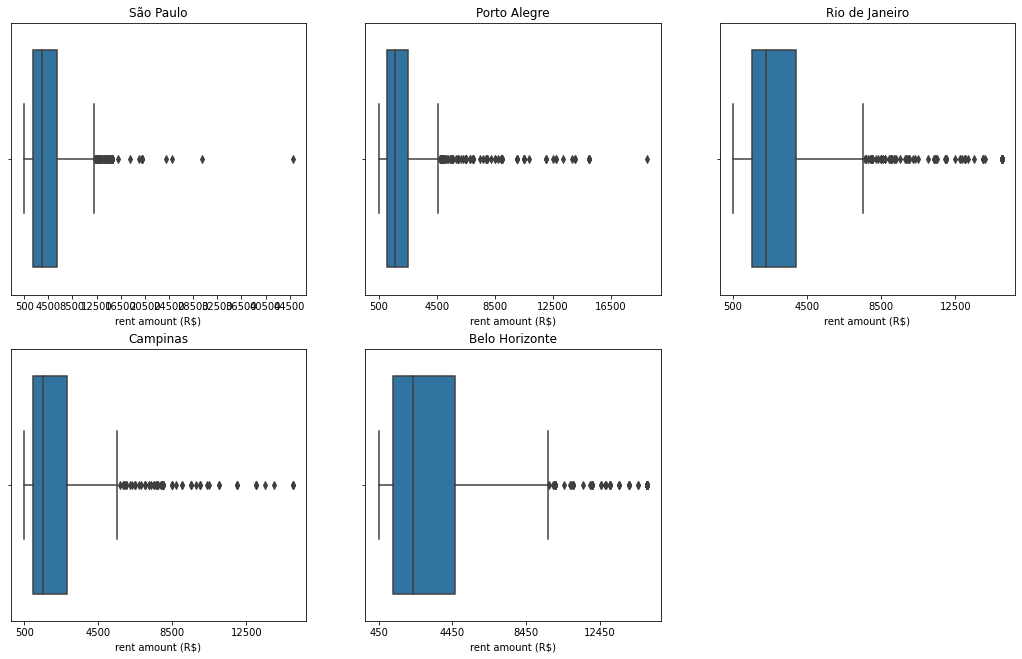

In [162]:
box_plot()

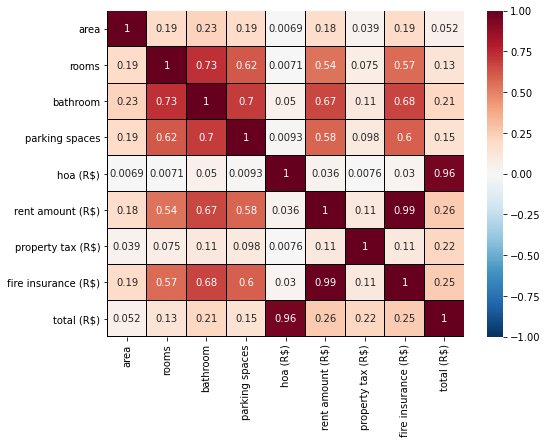

In [170]:
plt.figure(figsize=(8, 6))
sns.heatmap(housing2.corr(), vmin=-1, vmax=1, annot=True,linewidth=0.01, linecolor='black', cmap='RdBu_r')

In [173]:
housing2.corr()['rent amount (R$)'].sort_values(ascending=False)[1:]

fire insurance (R$)    0.987343
bathroom               0.668504
parking spaces         0.578361
rooms                  0.541758
total (R$)             0.264490
area                   0.180742
property tax (R$)      0.107884
hoa (R$)               0.036490
Name: rent amount (R$), dtype: float64

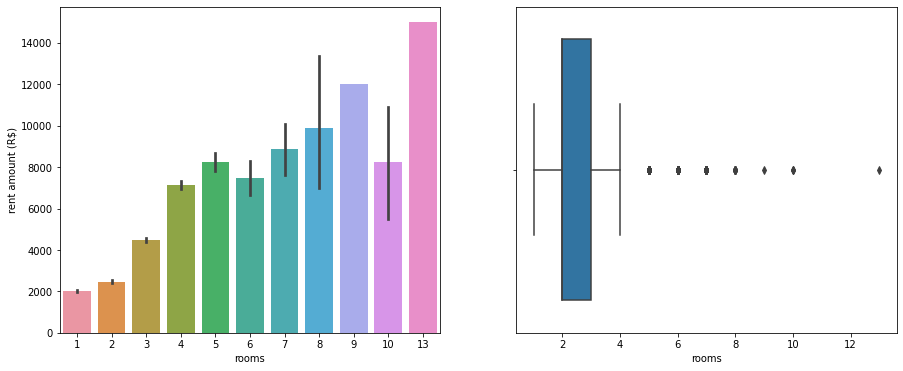

In [184]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=housing2['rooms'], y=housing2['rent amount (R$)'])
plt.subplot(1, 2, 2)
sns.boxplot(housing2['rooms'])

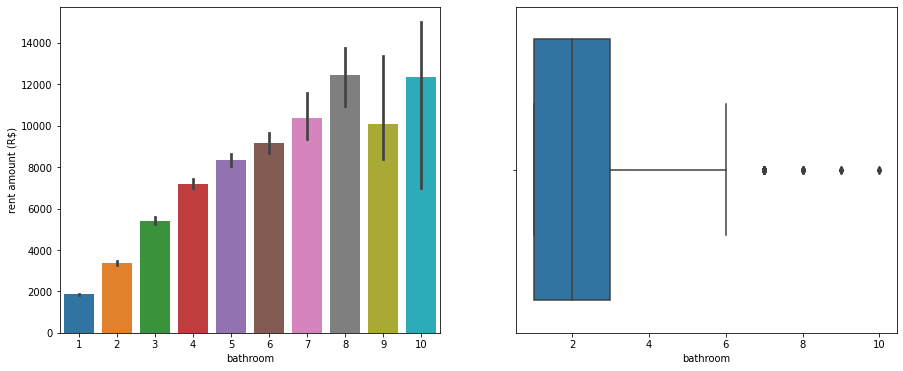

In [183]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=housing2['bathroom'], y=housing2['rent amount (R$)'])
plt.subplot(1, 2, 2)
sns.boxplot(housing2['bathroom'])

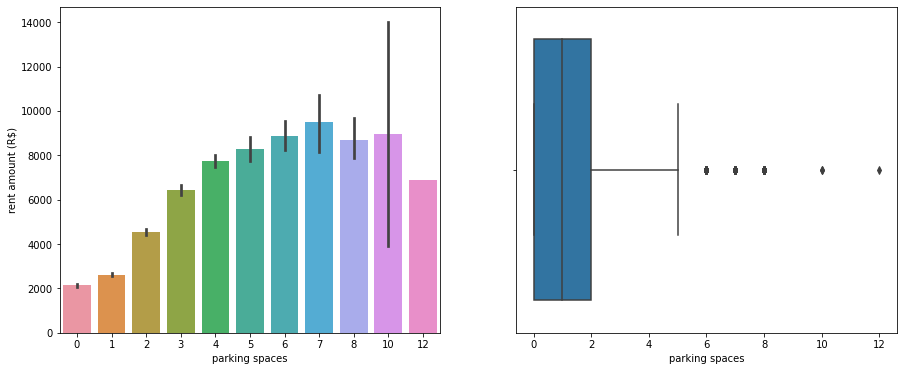

In [182]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=housing2['parking spaces'], y=housing2['rent amount (R$)'])
plt.subplot(1, 2, 2)
sns.boxplot(housing2['parking spaces'])

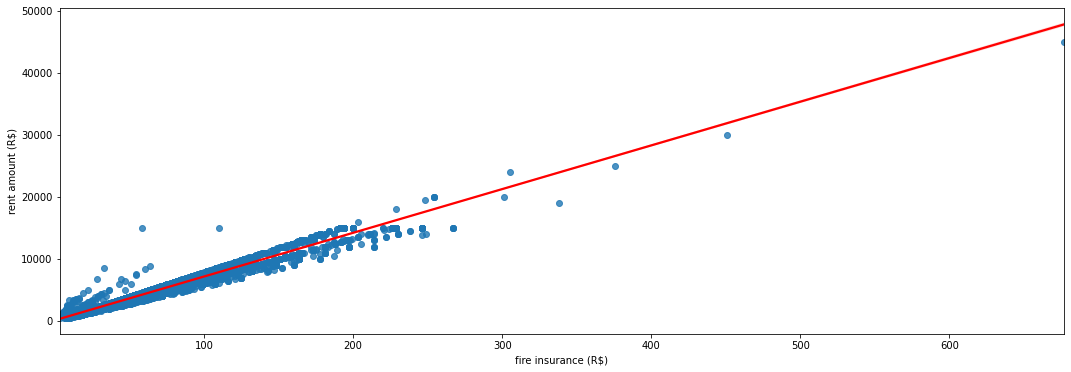

In [188]:
plt.figure(figsize=(18, 6))

sns.regplot(x = housing2['fire insurance (R$)'], y= housing2['rent amount (R$)'], line_kws={'color': 'r'})

In [200]:
f = housing2['furniture'].value_counts()
f

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

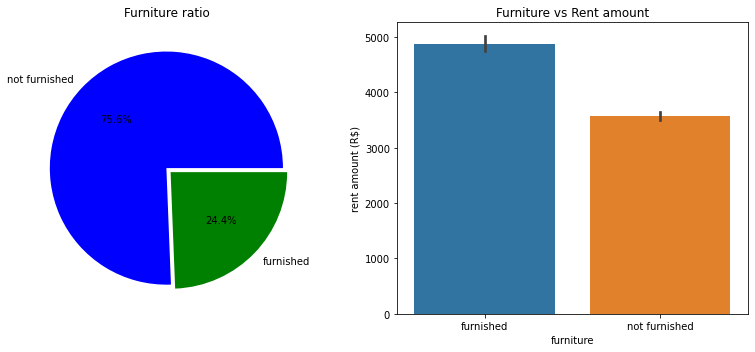

In [205]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.title('Furniture ratio')
plt.pie(f, labels = ['not furnished', 'furnished'], colors= ['b', 'g'], 
        explode = (0, 0.05), autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('Furniture vs Rent amount')
sns.barplot(x=housing2['furniture'], y=housing2['rent amount (R$)'])

plt.tight_layout()

In [209]:
housing2.groupby('furniture').agg('mean')['rent amount (R$)']

furniture
furnished        4882.28703
not furnished    3578.46092
Name: rent amount (R$), dtype: float64

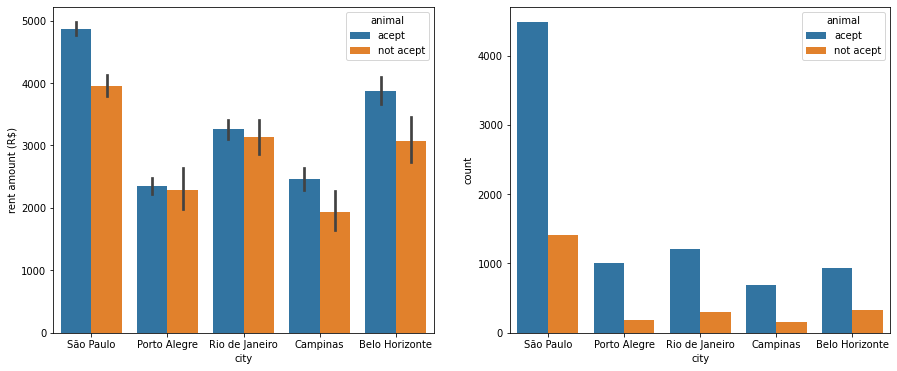

In [219]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=housing2['city'], y=housing2['rent amount (R$)'], hue = housing2['animal'] )

plt.subplot(1, 2, 2)
sns.countplot(x=housing2['city'], hue = housing2['animal'] )

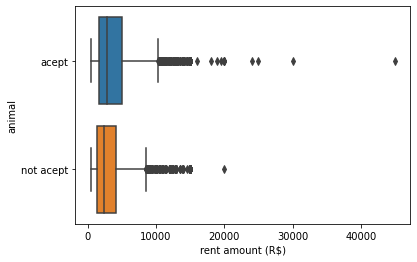

In [220]:
sns.boxplot(housing2['rent amount (R$)'], y = housing2['animal'] )

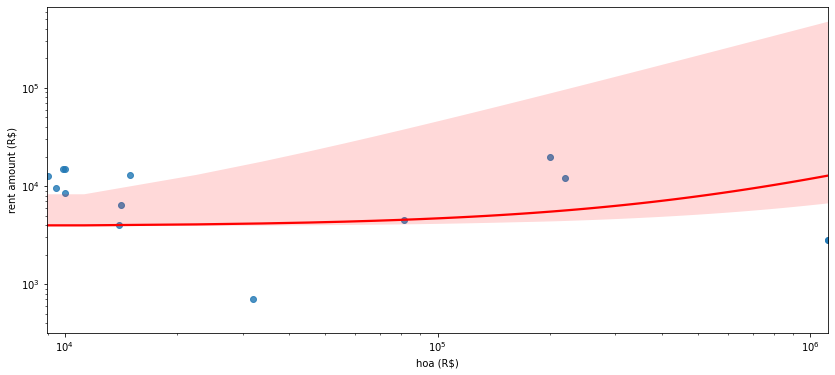

In [229]:
plt.figure(figsize=(14, 6))

sns.regplot(x = housing2['hoa (R$)'], y= housing2['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

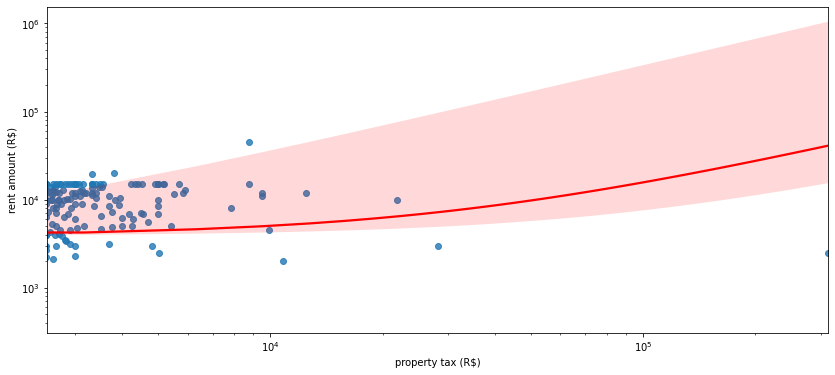

In [230]:
plt.figure(figsize=(14, 6))

sns.regplot(x = housing2['property tax (R$)'], y= housing2['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

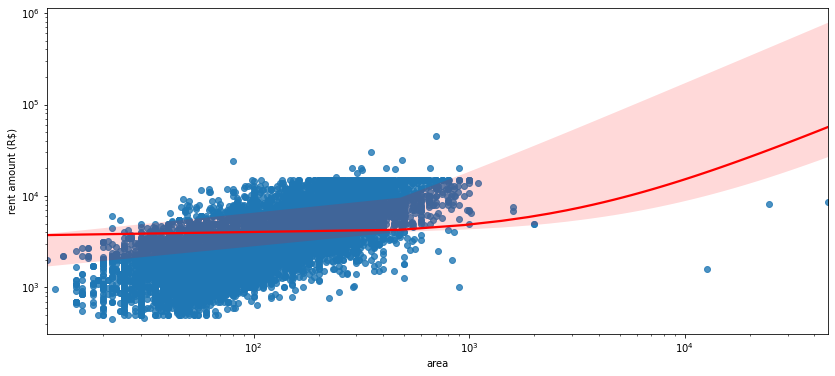

In [233]:
plt.figure(figsize=(14, 6))

sns.regplot(x = housing2['area'], y= housing2['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

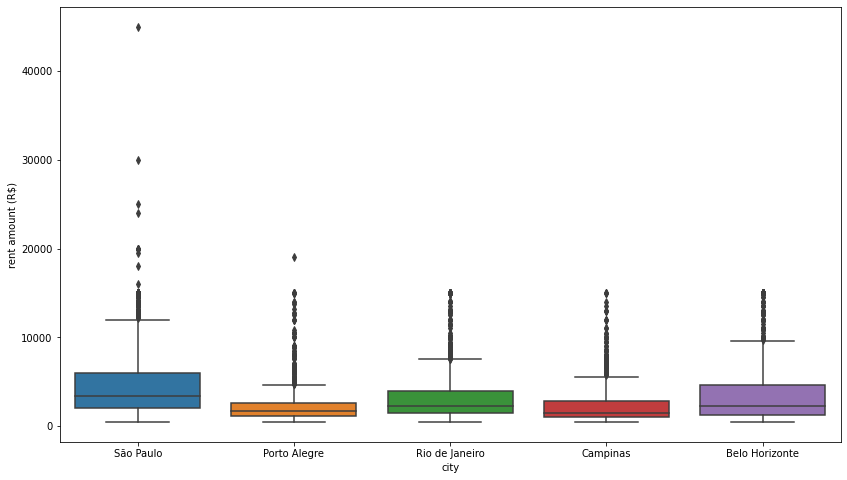

In [236]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=housing2['city'], y=housing2['rent amount (R$)'])

In [243]:
housing2.groupby('city').agg('median')['rent amount (R$)']

city
Belo Horizonte    2300
Campinas          1500
Porto Alegre      1650
Rio de Janeiro    2300
São Paulo         3400
Name: rent amount (R$), dtype: int64

In [244]:
city_group = housing2.groupby('city')['rent amount (R$)']

In [247]:
# Quantile 1 = 25% of data
Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)

In [248]:
Q1

city
Belo Horizonte    1250.0
Campinas          1000.0
Porto Alegre      1100.0
Rio de Janeiro    1500.0
São Paulo         2000.0
Name: rent amount (R$), dtype: float64

In [249]:
Q3

city
Belo Horizonte    4600.0
Campinas          2800.0
Porto Alegre      2550.0
Rio de Janeiro    3900.0
São Paulo         6000.0
Name: rent amount (R$), dtype: float64

In [ ]:
# IQR = Interquartile Range
IQR = Q3 - Q1

# Limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
# DataFrame to store the new data
new_data = pd.DataFrame()

for city in city_group.groups.keys():
    is_city = raw_data['city'] == city
    accepted_limit = ((raw_data['rent amount (R$)'] >= lower[city]) &
                     (raw_data['rent amount (R$)'] <= upper[city]))
    
    select = is_city & accepted_limit
    data_select = raw_data[select]
    new_data = pd.concat([new_data, data_select])

new_data.head()

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('With outliers')
sns.boxplot(raw_data['city'], raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
plt.title('Without outliers')
sns.boxplot(new_data['city'], new_data['rent amount (R$)'])

plt.tight_layout(pad=5.0)
plt.show()

In [210]:
housing2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [30]:
housing2.floor.value_counts()*100/housing2.floor.value_counts().sum()

-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
301     0.009353
51      0.009353
46      0.009353
Name: floor, dtype: float64

In [24]:
housing2.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [9]:
housing2.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [103]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [104]:
#drop irrelevant and null columns
col_drop = ['Address','SellerG', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'YearBuilt']
housing.drop(col_drop, axis = 1, inplace = True)

In [105]:
housing.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
Date                0
Distance            1
Postcode            1
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64

In [106]:
housing.dropna(subset = ['Regionname','Propertycount','CouncilArea','Price'],inplace = True)

In [107]:
housing.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
CouncilArea         0
Lattitude        6251
Longtitude       6251
Regionname          0
Propertycount       0
dtype: int64

In [108]:
housing.tail()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,4,h,1480000.0,PI,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,24/02/2018,6.3,3013.0,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,2,h,1020000.0,PI,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [109]:
housing['Lattitude'] = housing.groupby('Suburb')['Lattitude'].transform(lambda x: x.fillna(x.mean()))
housing['Longtitude'] = housing.groupby('Suburb')['Longtitude'].transform(lambda x: x.fillna(x.mean()))

In [110]:
housing.tail()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,4,h,1480000.0,PI,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.816821,144.884105,Western Metropolitan,6543.0
34856,Yarraville,2,h,1020000.0,PI,24/02/2018,6.3,3013.0,Maribyrnong City Council,-37.818100,144.893510,Western Metropolitan,6543.0


In [111]:
housing.isnull().sum()

Suburb            0
Rooms             0
Type              0
Price             0
Method            0
Date              0
Distance          0
Postcode          0
CouncilArea       0
Lattitude        69
Longtitude       69
Regionname        0
Propertycount     0
dtype: int64

In [112]:
housing.dropna(inplace = True)

In [113]:
housing.describe()

,Rooms,Price,Distance,Postcode,Lattitude,Longtitude,Propertycount
count,27175.000000,2.717500e+04,27175.000000,27175.000000,27175.000000,27175.000000,27175.000000
mean,2.992272,1.050798e+06,11.274418,3113.825796,-37.807823,144.997734,7575.296633
std,0.955443,6.421239e+05,6.791115,111.141898,0.091095,0.118264,4494.586754
min,1.000000,8.500000e+04,0.000000,3000.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,-37.861900,144.926200,4380.000000
50%,3.000000,8.710000e+05,10.400000,3088.000000,-37.801600,145.005062,6567.000000
75%,4.000000,1.300000e+06,14.000000,3154.000000,-37.749320,145.068600,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,-37.397800,145.526350,21650.000000


In [114]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27175 entries, 1 to 34856
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27175 non-null  object 
 1   Rooms          27175 non-null  int64  
 2   Type           27175 non-null  object 
 3   Price          27175 non-null  float64
 4   Method         27175 non-null  object 
 5   Date           27175 non-null  object 
 6   Distance       27175 non-null  float64
 7   Postcode       27175 non-null  float64
 8   CouncilArea    27175 non-null  object 
 9   Lattitude      27175 non-null  float64
 10  Longtitude     27175 non-null  float64
 11  Regionname     27175 non-null  object 
 12  Propertycount  27175 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.9+ MB


In [115]:
housing['Date'] = housing['Date'].apply(lambda a: int(a.split('/')[2]))

In [116]:
housing.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Postcode         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [117]:
housing.corr().Price.sort_values(ascending=False)[1:]

Rooms            0.465474
Longtitude       0.195491
Postcode         0.045151
Date            -0.019573
Propertycount   -0.059753
Lattitude       -0.206892
Distance        -0.211135
Name: Price, dtype: float64

In [118]:
housing.Rooms.value_counts()

3     11914
2      6772
4      5905
5      1208
1      1196
6       137
7        20
8        14
10        5
12        2
9         1
16        1
Name: Rooms, dtype: int64

In [119]:
housing = housing[housing['Rooms'] < 9]

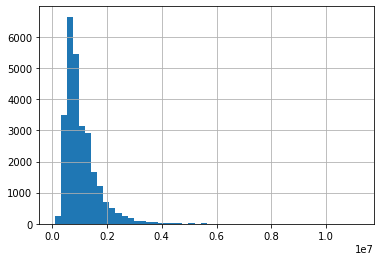

In [120]:
housing.Price.hist(bins=50)

In [121]:
housing = housing[housing['Price'] < 3500000]

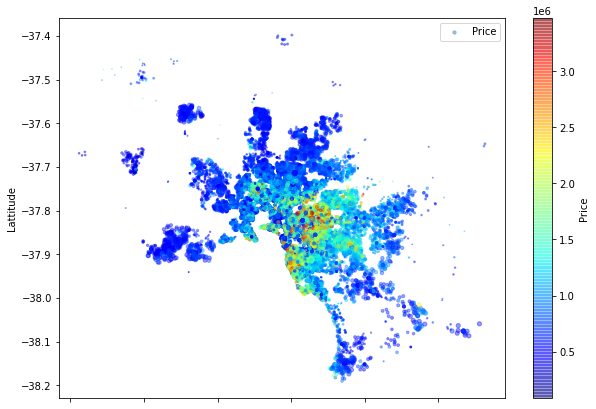

In [129]:
housing.plot(kind = 'scatter', x = 'Longtitude', y = 'Lattitude', alpha = 0.4,
            s = housing.Propertycount /1000, c = 'Price', label = 'Price', figsize = (10,7),
            cmap = plt.get_cmap('jet'), colorbar = True)

In [ ]:
# Dropping Suburb, Postcode and Council Area columns since they correlate with Region name, Long&Lat and Distance from CBD
drop = ['Suburb','Postcode', 'CouncilArea']
housing.drop(drop, axis = 1, inplace = True)

In [130]:
housing.head()

,Rooms,Type,Price,Method,Date,Distance,Lattitude,Longtitude,Regionname,Propertycount
1,2,h,1480000.0,S,2016,2.5,-37.7996,144.9984,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,2016,2.5,-37.8079,144.9934,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,2017,2.5,-37.8093,144.9944,Northern Metropolitan,4019.0
5,3,h,850000.0,PI,2017,2.5,-37.7969,144.9969,Northern Metropolitan,4019.0
6,4,h,1600000.0,VB,2016,2.5,-37.8072,144.9941,Northern Metropolitan,4019.0


In [131]:
housing.corr()

,Rooms,Price,Date,Distance,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.474545,0.092094,0.299179,0.030208,0.079542,-0.081122
Price,0.474545,1.000000,-0.020349,-0.213422,-0.221132,0.216580,-0.069275
Date,0.092094,-0.020349,1.000000,0.231867,0.022354,0.039818,0.012005
Distance,0.299179,-0.213422,0.231867,1.000000,-0.099248,0.194847,-0.021597
Lattitude,0.030208,-0.221132,0.022354,-0.099248,1.000000,-0.347892,0.040231
Longtitude,0.079542,0.216580,0.039818,0.194847,-0.347892,1.000000,0.029539
Propertycount,-0.081122,-0.069275,0.012005,-0.021597,0.040231,0.029539,1.000000


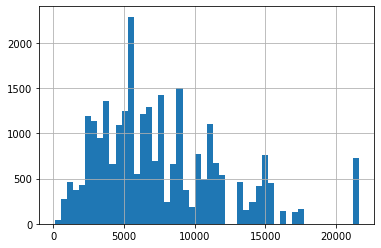

In [126]:
housing.Propertycount.hist(bins=50)

In [132]:
housing.Method.value_counts()

S     17305
SP     3579
PI     3210
VB     2624
SA      188
Name: Method, dtype: int64

In [133]:
housing.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [134]:
housing.corr()['Price'].sort_values(ascending=False)[1:]

Rooms            0.474545
Longtitude       0.216580
Date            -0.020349
Propertycount   -0.069275
Distance        -0.213422
Lattitude       -0.221132
Name: Price, dtype: float64

In [ ]:
housing.plot(kind = 'scatter', x = 'Propertycount', y = 'Price', alpha = 0.2)

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 101)

In [138]:
train_set.Rooms.value_counts()/len(train_set)

3    0.441600
2    0.250000
4    0.216503
1    0.044183
5    0.041860
6    0.004739
7    0.000650
8    0.000465
Name: Rooms, dtype: float64

In [140]:
test_set.Rooms.value_counts()/len(test_set)

3    0.440728
2    0.257711
4    0.209030
1    0.045522
5    0.040877
6    0.004645
7    0.000743
8    0.000743
Name: Rooms, dtype: float64

In [168]:
housing = train_set.drop('Price',axis = 1)
housing_labels = train_set['Price'].copy()

In [145]:
housing

,Rooms,Type,Method,Date,Distance,Lattitude,Longtitude,Regionname,Propertycount
7699,3,h,S,2017,9.9,-37.730400,144.946300,Northern Metropolitan,7485.0
12309,4,h,S,2017,10.8,-37.775900,144.855200,Western Metropolitan,3589.0
29977,2,h,PI,2018,6.4,-37.797459,144.871331,Western Metropolitan,5058.0
17179,4,h,S,2017,22.7,-37.974120,145.180220,South-Eastern Metropolitan,11806.0
22708,4,h,S,2017,8.4,-37.742830,145.008600,Northern Metropolitan,14577.0
...,...,...,...,...,...,...,...,...,...
7507,3,h,SP,2016,11.5,-37.717800,144.912100,Northern Metropolitan,2651.0
10366,3,h,SP,2016,6.5,-37.758043,145.005062,Northern Metropolitan,8870.0
22993,3,h,S,2017,10.3,-37.923640,145.011180,Southern Metropolitan,6938.0
23224,3,h,S,2017,7.8,-37.773470,145.064000,Eastern Metropolitan,1554.0


In [253]:
housing.Type.value_counts()

h    18213
u     5904
t     2865
Name: Type, dtype: int64

In [254]:
housing.Method.value_counts()

S     17360
SP     3589
PI     3214
VB     2630
SA      189
Name: Method, dtype: int64

In [150]:
housing_num = housing.drop(['Type','Method','Regionname'],axis=1)

In [152]:
housing_cat = housing[['Type','Method','Regionname']]

In [151]:
housing_num

,Rooms,Date,Distance,Lattitude,Longtitude,Propertycount
7699,3,2017,9.9,-37.730400,144.946300,7485.0
12309,4,2017,10.8,-37.775900,144.855200,3589.0
29977,2,2018,6.4,-37.797459,144.871331,5058.0
17179,4,2017,22.7,-37.974120,145.180220,11806.0
22708,4,2017,8.4,-37.742830,145.008600,14577.0
...,...,...,...,...,...,...
7507,3,2016,11.5,-37.717800,144.912100,2651.0
10366,3,2016,6.5,-37.758043,145.005062,8870.0
22993,3,2017,10.3,-37.923640,145.011180,6938.0
23224,3,2017,7.8,-37.773470,145.064000,1554.0


In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [159]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [156]:
hosuing_num_tr = num_pipeline.fit_transform(housing_num)

In [157]:
from sklearn.compose import ColumnTransformer

In [158]:
num_attr = list(housing_num)
cat_attr = list(housing_cat)

In [160]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attr),
    ('cat', OneHotEncoder(), cat_attr)
])

In [161]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
# Training

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
lin_reg = LinearRegression()

In [169]:
housing_labels

7699      983000.0
12309    1000000.0
29977     775000.0
17179     805000.0
22708     950000.0
           ...    
7507      810000.0
10366    1470000.0
22993    2060000.0
23224    1630000.0
17119     387000.0
Name: Price, Length: 21524, dtype: float64

In [170]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
some_data = housing.iloc[:5]

In [172]:
some_data

,Rooms,Type,Method,Date,Distance,Lattitude,Longtitude,Regionname,Propertycount
7699,3,h,S,2017,9.9,-37.730400,144.946300,Northern Metropolitan,7485.0
12309,4,h,S,2017,10.8,-37.775900,144.855200,Western Metropolitan,3589.0
29977,2,h,PI,2018,6.4,-37.797459,144.871331,Western Metropolitan,5058.0
17179,4,h,S,2017,22.7,-37.974120,145.180220,South-Eastern Metropolitan,11806.0
22708,4,h,S,2017,8.4,-37.742830,145.008600,Northern Metropolitan,14577.0


In [173]:
some_labels = housing_labels.iloc[:5]

In [174]:
some_labels

7699      983000.0
12309    1000000.0
29977     775000.0
17179     805000.0
22708     950000.0
Name: Price, dtype: float64

In [175]:
some_data_prepared = full_pipeline.transform(some_data)

In [176]:
some_data_prepared

array([[ 0.02031419,  0.25167549, -0.21138732,  0.84547726, -0.43674794,
        -0.02022363,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.08936687,  0.25167549, -0.07894566,  0.34845381, -1.20430809,
        -0.88802066,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-1.0487385 ,  1.82594553, -0.72643821,  0.11294794, -1.06839309,
        -0.56081485,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 1.08936687

In [177]:
lin_reg.predict(some_data_prepared)

array([ 995328., 1173504.,  856064., 1204224., 1348096.])

In [178]:
some_labels

7699      983000.0
12309    1000000.0
29977     775000.0
17179     805000.0
22708     950000.0
Name: Price, dtype: float64

In [179]:
from sklearn.metrics import mean_squared_error

In [180]:
housing_predictions = lin_reg.predict(housing_prepared)

In [181]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [182]:
lin_rmse = np.sqrt(lin_mse)

In [183]:
lin_rmse

344811.2734316195

Text(0, 0.5, 'Predicted')

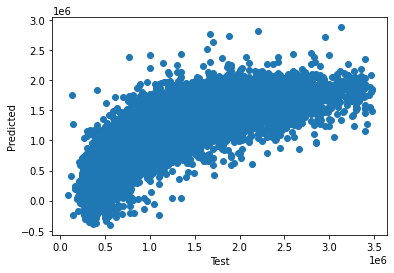

In [184]:
plt.scatter(housing_labels, housing_predictions)
plt.xlabel('Test')
plt.ylabel('Predicted')

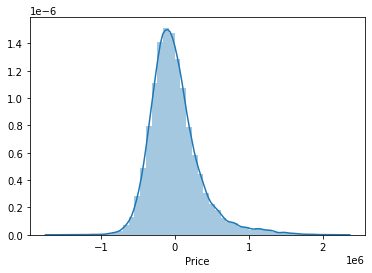

In [185]:
sns.distplot((housing_labels - housing_predictions),bins=50)

In [ ]:
# evaluation with cross-validation linear regression

In [188]:
from sklearn.model_selection import cross_val_score

In [189]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print ("St.d", scores.std())

In [202]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv = 10)

In [191]:
lin_rmse_scores = np.sqrt(lin_scores)

In [204]:
display_scores(lin_rmse_scores)

Scores [353966.92537441 336124.39162037 340835.60925176 351558.42936462
 335831.8277726  329057.37874643 368832.59639299 345390.55531712
 353489.9185832  335012.98909336]
Mean 345010.06215168675
St.d 11391.765233957223


In [ ]:
# Decision Tree

In [154]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
tree_reg = DecisionTreeRegressor()

In [156]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [157]:
housing_predictions = tree_reg.predict(housing_prepared)

In [158]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [159]:
tree_rmse = np.sqrt(tree_mse)

In [160]:
tree_rmse

0.0

In [ ]:
# Evaluation with cross-validation

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
scores = cross_val_score (tree_reg, housing_prepared, housing_labels,
                         scoring = "neg_mean_squared_error", cv=10)

In [163]:
tree_rmse_scores = np.sqrt(-scores)

In [164]:
tree_rmse_scores

array([69360.80763656, 65806.56695039, 71398.41657343, 67554.77525238,
       71809.43421529, 74221.15135909, 70652.13944502, 71119.65207654,
       76939.91605177, 70870.93850069])

In [168]:
print ("Mean", tree_rmse_scores.mean())

Mean 70973.37980611474


In [172]:
print("Std", tree_rmse_scores.std())

Std 2968.9308582437034


In [173]:
# Random Forest

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
forest_reg = RandomForestRegressor()

In [196]:
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [197]:
forest_rmse = mean_squared_error(housing_labels, housing_predictions)

In [198]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print ("St.d", scores.std())

In [199]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv = 10)

In [205]:
forest_rmse = np.sqrt(-forest_scores)

In [206]:
display_scores(forest_rmse)

Scores [283313.74009268 256480.31753008 265614.06986458 262959.29176736
 253325.19448737 265265.49067327 279336.50352094 270305.73491599
 270639.06886907 254393.73220835]
Mean 266163.3143929696
St.d 9556.863361633787


Text(0, 0.5, 'Predicted')

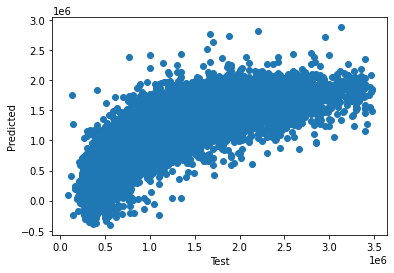

In [207]:
h_x = test_set.drop('Price',axis = 1)
h_y = test_set['Price'].copy()
h_x_prepared = full_pipeline.fit_transform(h_x)

In [212]:
housing_predictions = forest_reg.predict(h_x_prepared)

Text(0, 0.5, 'Predicted')

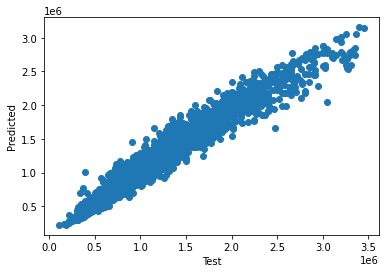

In [213]:
plt.scatter(h_y, housing_predictions)
plt.xlabel('Test')
plt.ylabel('Predicted')